In [615]:
import pandas as pd
import numpy as np

In [617]:
df=pd.read_csv('mohm.csv',usecols=['date','state_name','commodity','price'],parse_dates = ["date"])
df.head()

,date,state_name,commodity,price
0,2015-01-01,Andhra Pradesh,Rice,26.0
1,2015-01-01,Assam,Rice,24.0
2,2015-01-01,Bihar,Rice,NaN
3,2015-01-01,Chandigarh,Rice,29.0
4,2015-01-01,Chhattisgarh,Rice,26.0


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901416 entries, 0 to 1901415
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   state_name  object        
 2   commodity   object        
 3   price       float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 58.0+ MB


In [621]:
df.head()

,date,state_name,commodity,price
0,2015-01-01,Andhra Pradesh,Rice,26.0
1,2015-01-01,Assam,Rice,24.0
2,2015-01-01,Bihar,Rice,NaN
3,2015-01-01,Chandigarh,Rice,29.0
4,2015-01-01,Chhattisgarh,Rice,26.0


In [623]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from prophet import Prophet

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901416 entries, 0 to 1901415
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   state_name  object        
 2   commodity   object        
 3   price       float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 58.0+ MB


In [627]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1901416 entries, 0 to 1901415
Series name: price
Non-Null Count    Dtype  
--------------    -----  
1826128 non-null  float64
dtypes: float64(1)
memory usage: 14.5 MB


In [629]:
df.index

RangeIndex(start=0, stop=1901416, step=1)

In [631]:
df['date'].unique().shape

(3135,)

In [633]:
df['commodity'].value_counts()

commodity
Rice                      86428
Wheat                     86428
Onion                     86428
Potato                    86428
Salt Pack (Iodised)       86428
Tea Loose                 86428
Gur                       86428
Palm Oil (Packed)         86428
Sunflower Oil (Packed)    86428
Soya Oil (Packed)         86428
Vanaspati (Packed)        86428
Mustard Oil (Packed)      86428
Groundnut Oil (Packed)    86428
Milk @                    86428
Sugar                     86428
Masoor Dal                86428
Moong Dal                 86428
Urad Dal                  86428
Tur/Arhar Dal             86428
Gram Dal                  86428
Atta (Wheat)              86428
Tomato                    86428
Name: count, dtype: int64

In [635]:
df['date'].tail(4)


1901412   2022-12-31
1901413   2022-12-31
1901414   2022-12-31
1901415   2022-12-31
Name: date, dtype: datetime64[ns]

In [637]:
df['date'].head(4)

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
Name: date, dtype: datetime64[ns]

In [639]:
df.shape

(1901416, 4)

In [641]:
df['date'] = pd.to_datetime(df['date']) 
df.set_index('date', inplace=True)

In [643]:
# data extraction
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.isocalendar().week



In [644]:
df.head()

,state_name,commodity,price,Year,Month,Day,WeekOfYear
date,,,,,,,
2015-01-01,Andhra Pradesh,Rice,26.0,2015,1,1,1
2015-01-01,Assam,Rice,24.0,2015,1,1,1
2015-01-01,Bihar,Rice,NaN,2015,1,1,1
2015-01-01,Chandigarh,Rice,29.0,2015,1,1,1
2015-01-01,Chhattisgarh,Rice,26.0,2015,1,1,1


In [647]:
df.isnull().sum()

state_name        0
commodity         0
price         75288
Year              0
Month             0
Day               0
WeekOfYear        0
dtype: int64

In [649]:
df['state_name'].value_counts()

state_name
Madhya Pradesh         68860
Maharashtra            68662
West Bengal            68662
Andhra Pradesh         68596
Delhi                  68354
Tamil Nadu             68156
Odisha                 67892
Telangana              67144
Haryana                67144
Punjab                 66946
Gujarat                66374
Chhattisgarh           66220
Himachal Pradesh       66044
Puducherry             63448
Bihar                  63184
Rajasthan              62502
Uttarakhand            61424
Assam                  61380
Uttar Pradesh          61050
Chandigarh             60346
Jharkhand              55528
Meghalaya              55528
Jammu and Kashmir      55418
Karnataka              54780
Tripura                53812
Kerala                 52888
Goa                    50952
Andaman and Nicobar    42460
Nagaland               39226
Sikkim                 35420
Mizoram                33088
Arunachal pradesh      30844
Manipur                20768
DNH and DD              8316
Nam

In [651]:
missing_by_state = df[df['price'].isnull()].groupby('state_name').size().sort_values(ascending=False)
print(missing_by_state)


state_name
Tripura                9410
Mizoram                7513
Arunachal pradesh      6117
Andaman and Nicobar    4924
Assam                  4594
Sikkim                 4305
Odisha                 3685
Manipur                3471
Puducherry             3295
Himachal Pradesh       3207
Nagaland               2939
Uttarakhand            2429
Chandigarh             2100
Bihar                  2099
Jammu and Kashmir      1975
Meghalaya              1957
Goa                    1945
Tamil Nadu             1849
Kerala                 1670
Rajasthan              1509
Punjab                  959
Delhi                   951
Uttar Pradesh           752
Andhra Pradesh          606
Jharkhand               192
Haryana                 179
Karnataka               177
West Bengal             105
DNH and DD               98
Telangana                93
Gujarat                  70
Chhattisgarh             70
Maharashtra              42
Madhya Pradesh            1
dtype: int64


In [653]:
df = df.reset_index()


In [655]:
print(df.columns)
df.sample(10)

Index(['date', 'state_name', 'commodity', 'price', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')


,date,state_name,commodity,price,Year,Month,Day,WeekOfYear
872833,2015-01-15,Andaman and Nicobar,Masoor Dal,109.00,2015,1,15,3
1262499,2015-04-21,Uttarakhand,Milk @,36.00,2015,4,21,17
109106,2020-09-02,Uttar Pradesh,Gur,43.75,2020,9,2,36
1014469,2021-04-17,Chhattisgarh,Rice,34.67,2021,4,17,15
581058,2017-05-10,Kerala,Gur,52.67,2017,5,10,19
157736,2023-06-03,Maharashtra,Sunflower Oil (Packed),138.78,2023,6,3,22
1604407,2017-09-26,Chandigarh,Mustard Oil (Packed),105.00,2017,9,26,39
132381,2023-01-03,Tripura,Moong Dal,110.00,2023,1,3,1
1335763,2017-06-22,Goa,Masoor Dal,NaN,2017,6,22,25
525544,2018-06-09,Uttar Pradesh,Moong Dal,69.00,2018,6,9,23


In [657]:
#since Tripura's commodity price is major missing we will se if we can relpace it with mean or not??
avg_price = df.groupby(['commodity', 'state_name'])['price'].mean().reset_index()
pivot_price = avg_price.pivot(index='state_name', columns='commodity', values='price')
tripura_prices = pivot_price.loc['Mizoram']  # This is a Series: commodity → price

# Subtract Tripura prices from each state
price_diff = pivot_price.subtract(tripura_prices)


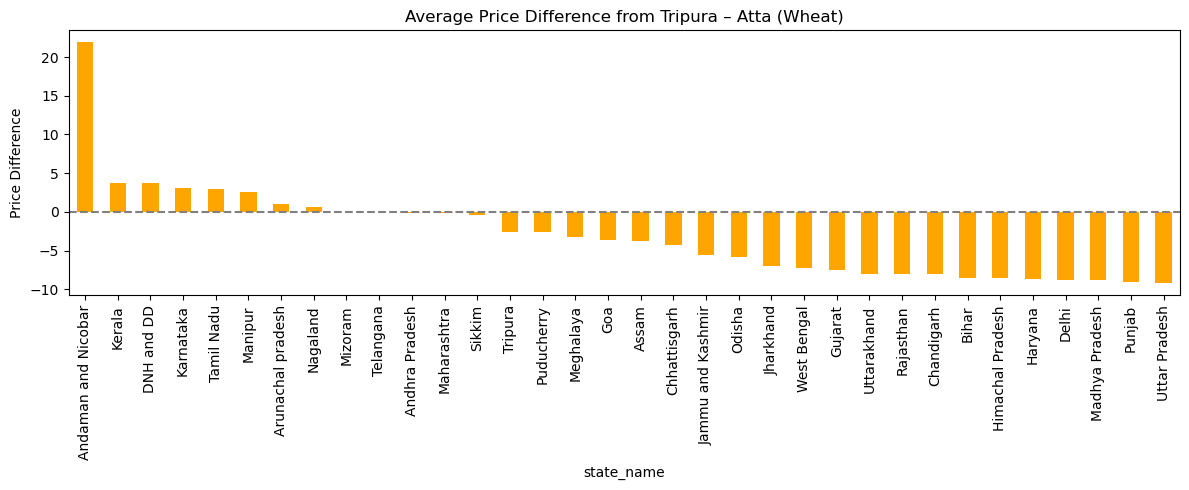

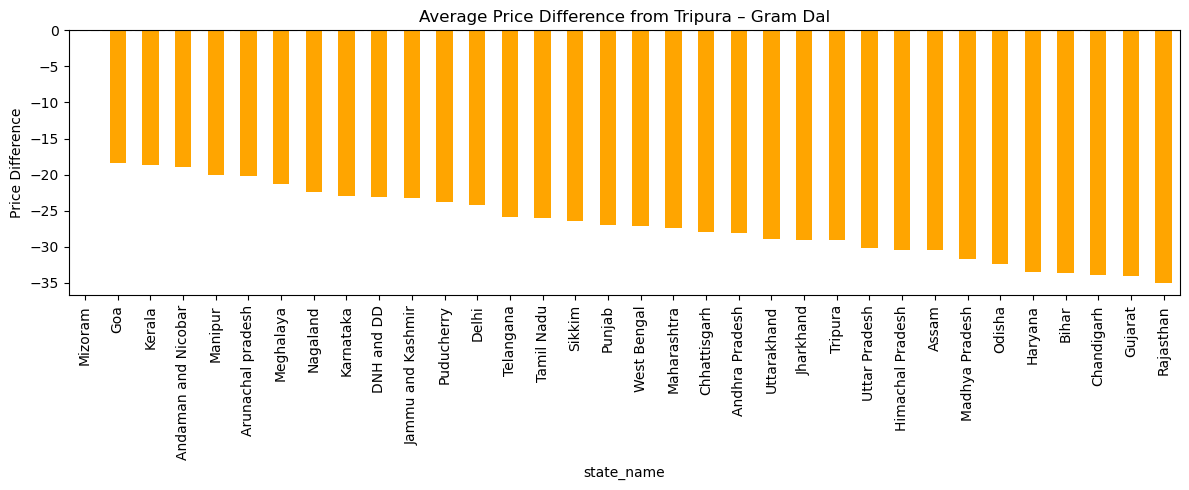

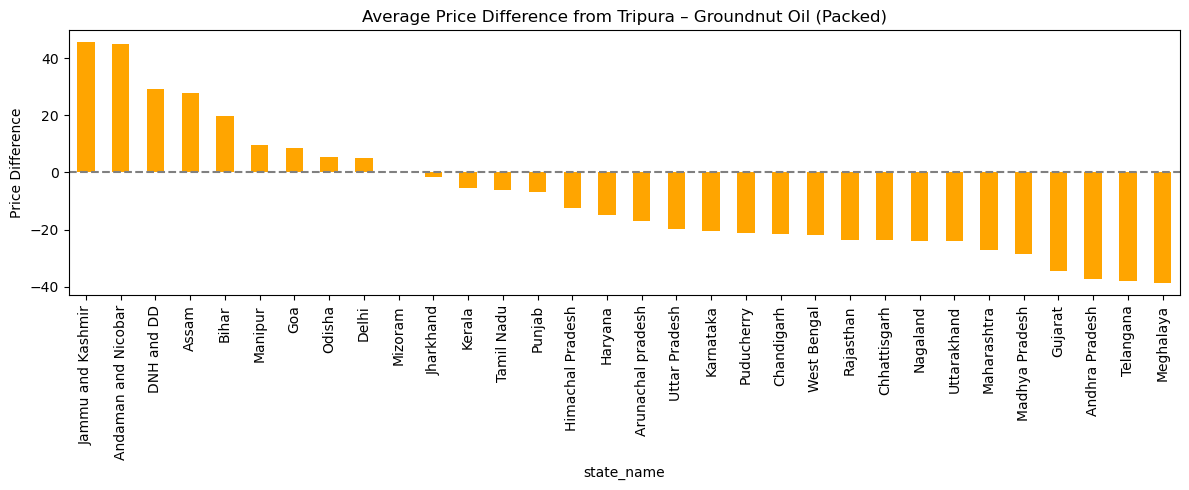

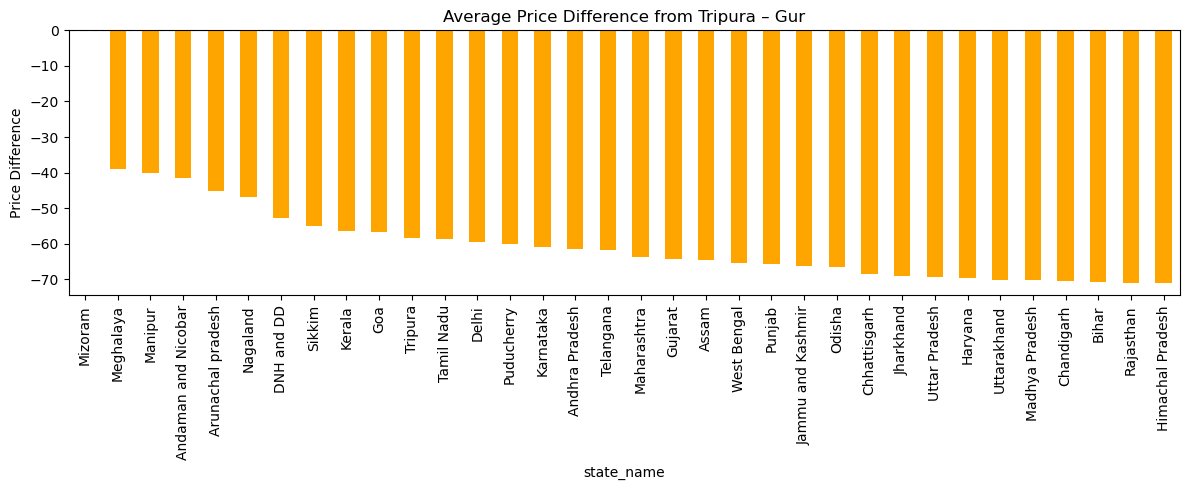

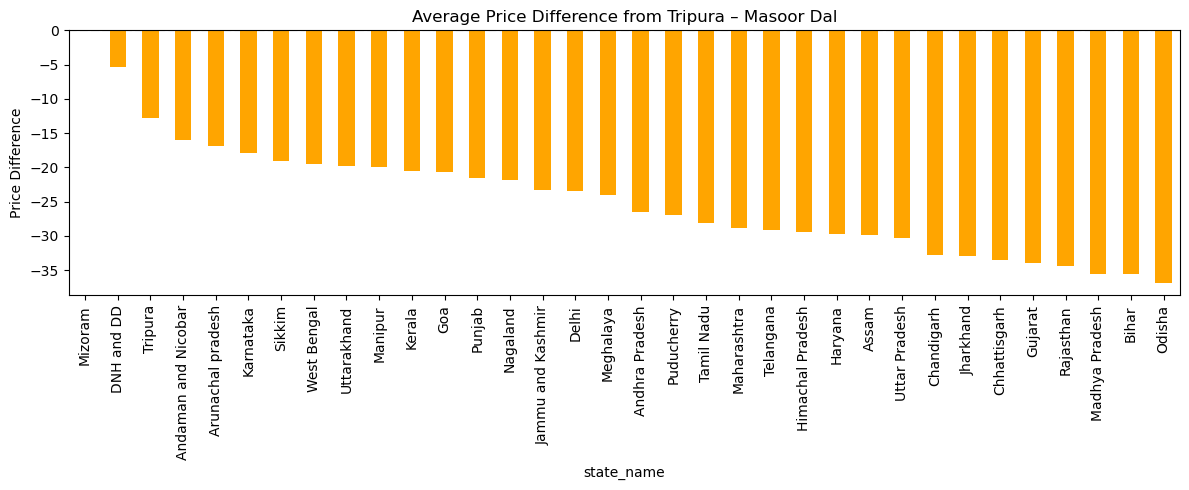

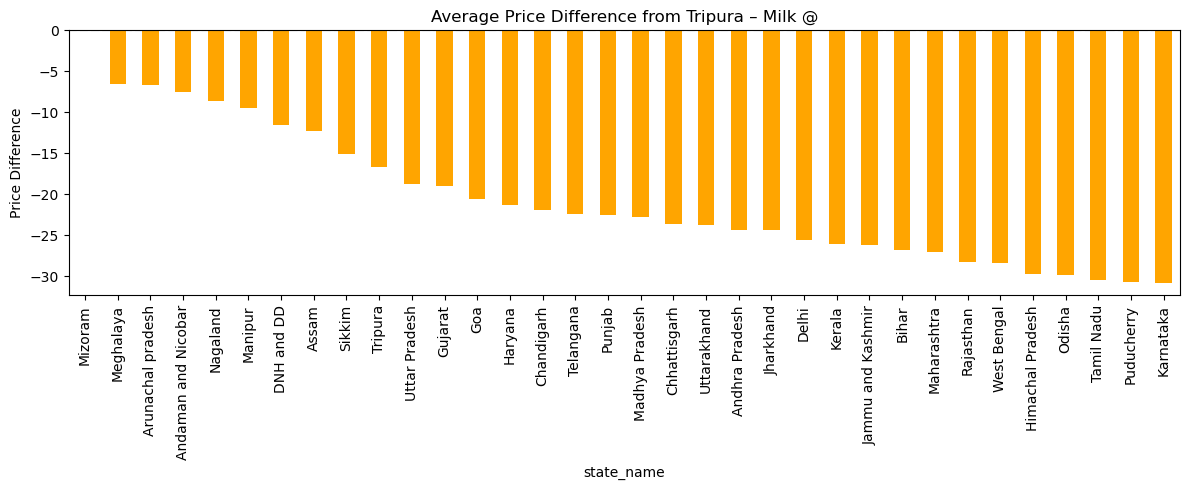

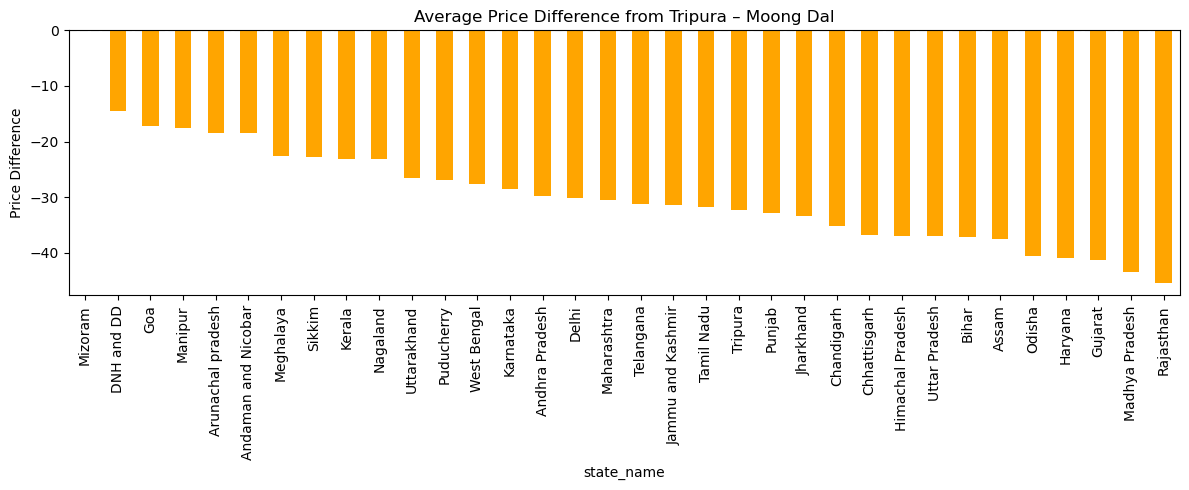

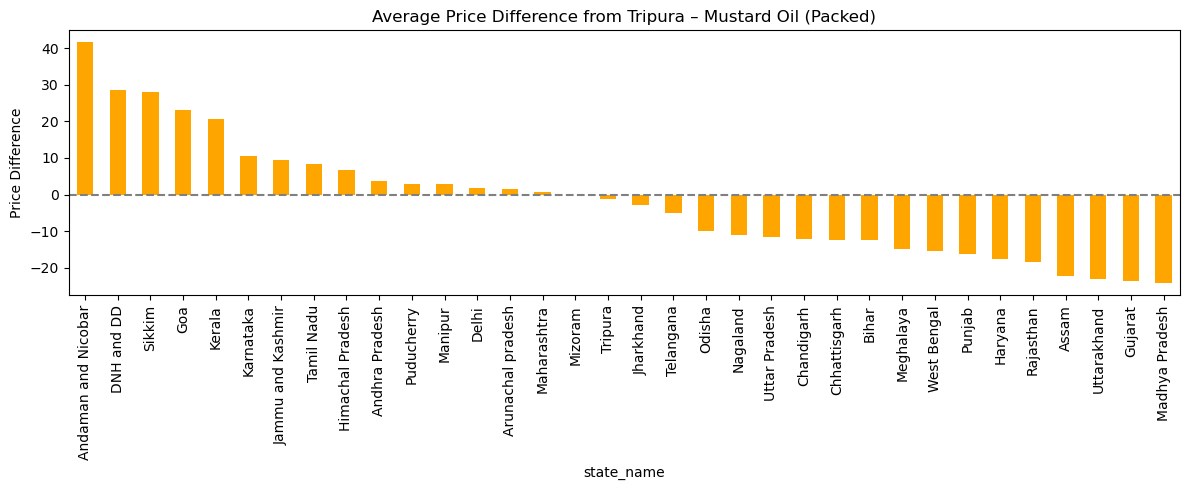

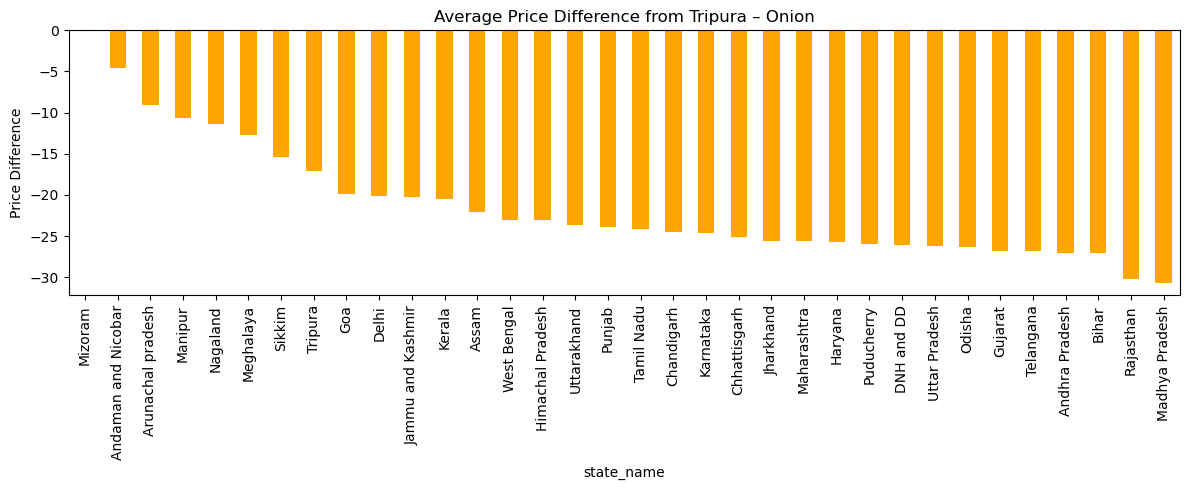

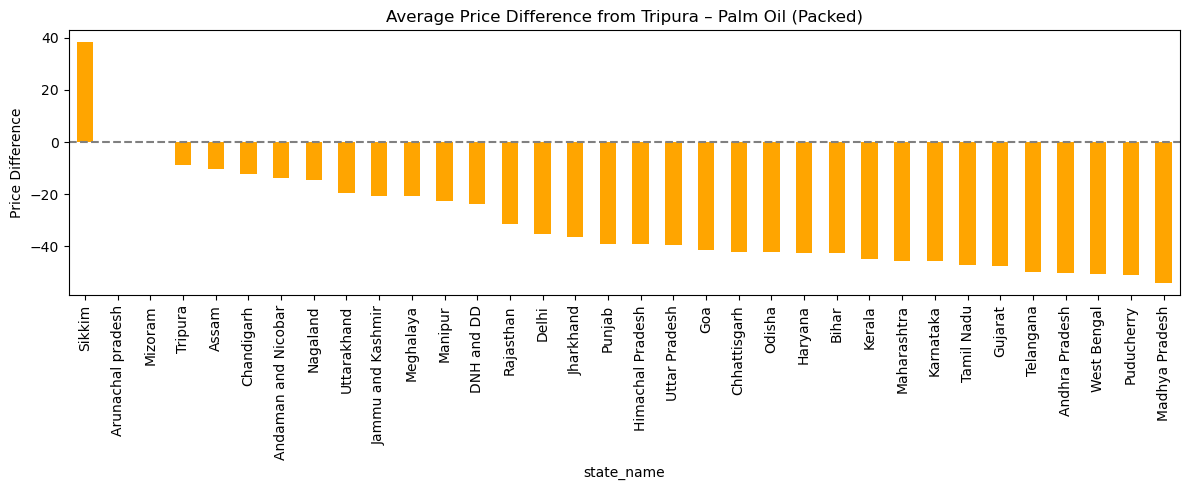

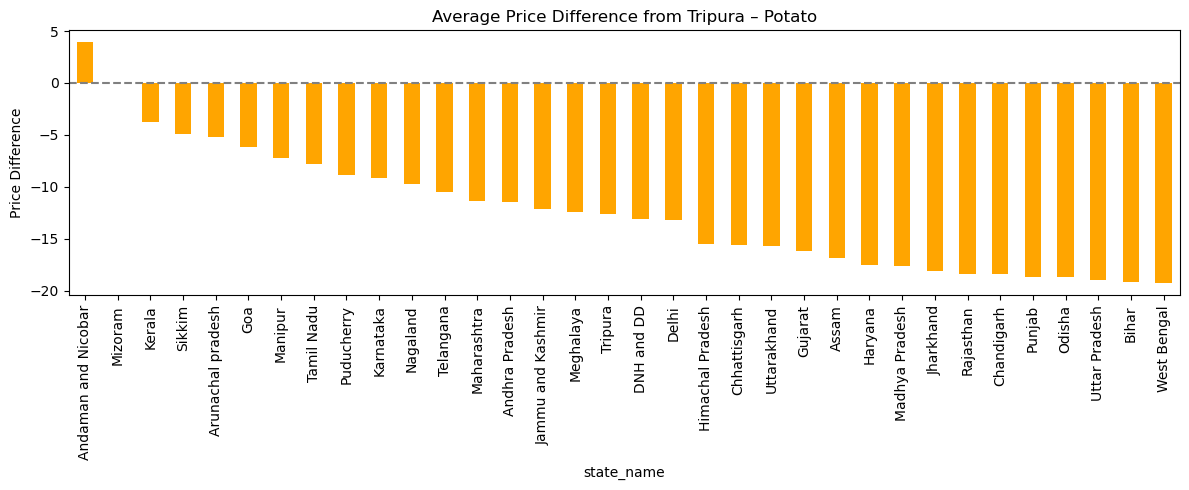

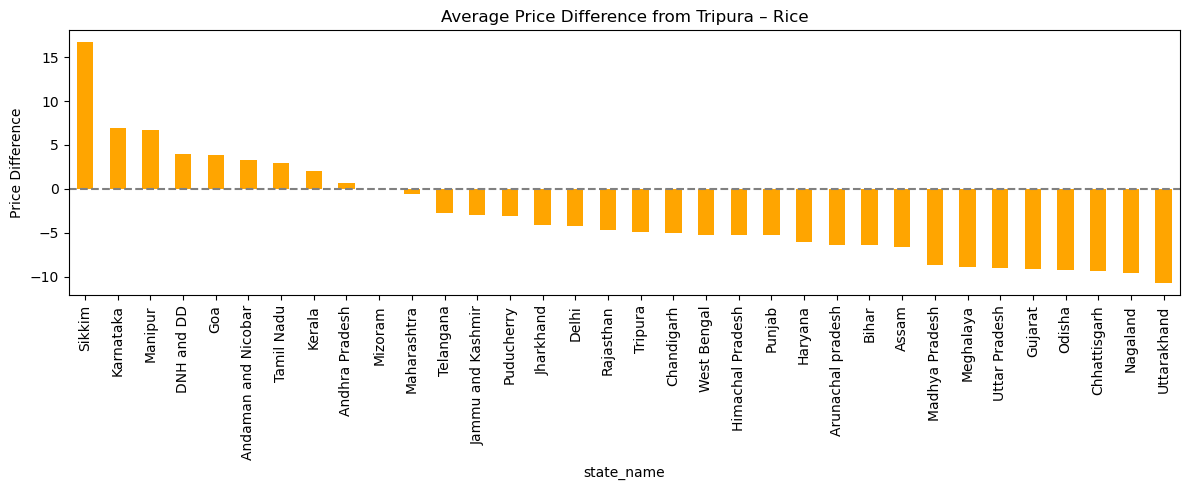

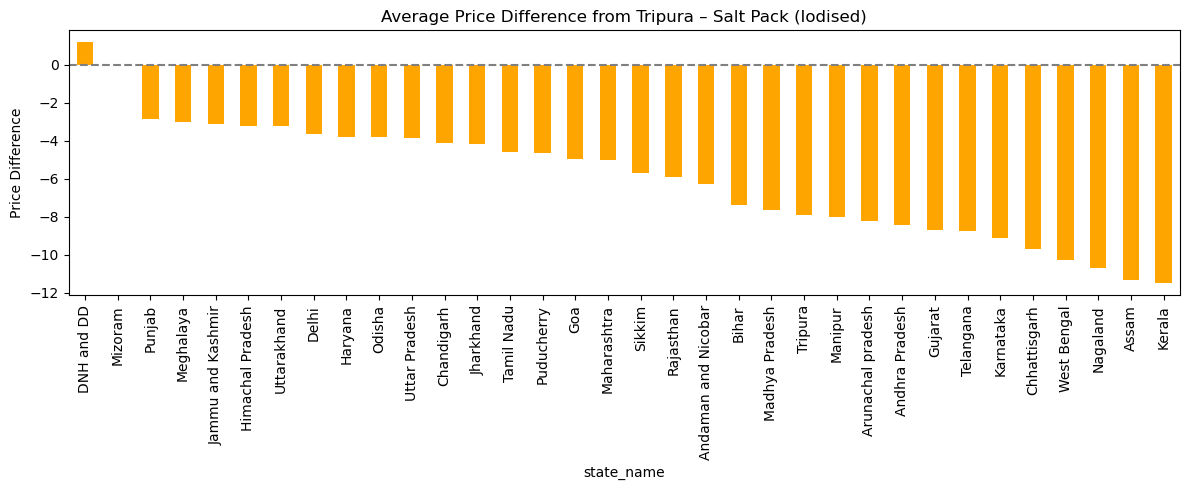

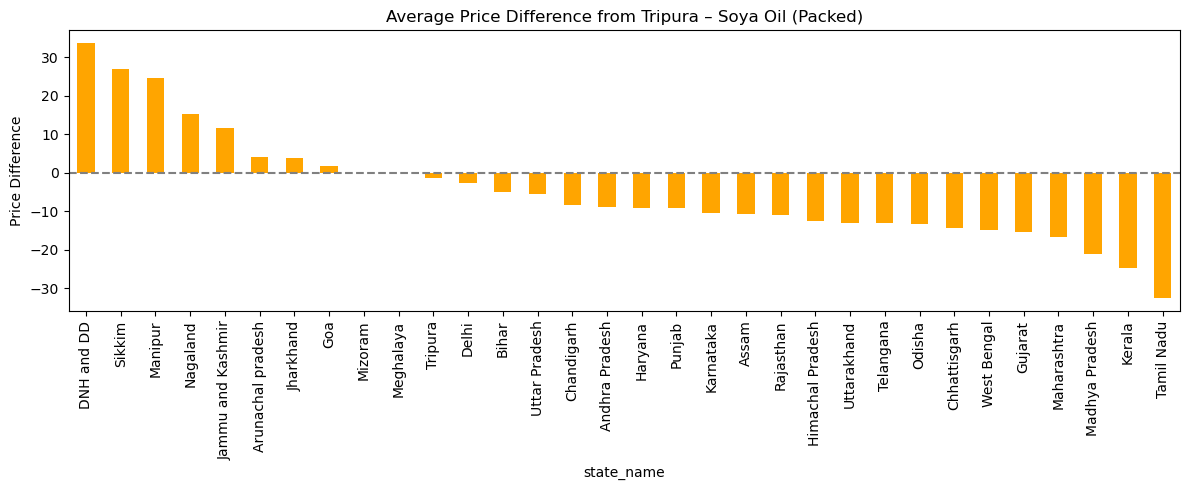

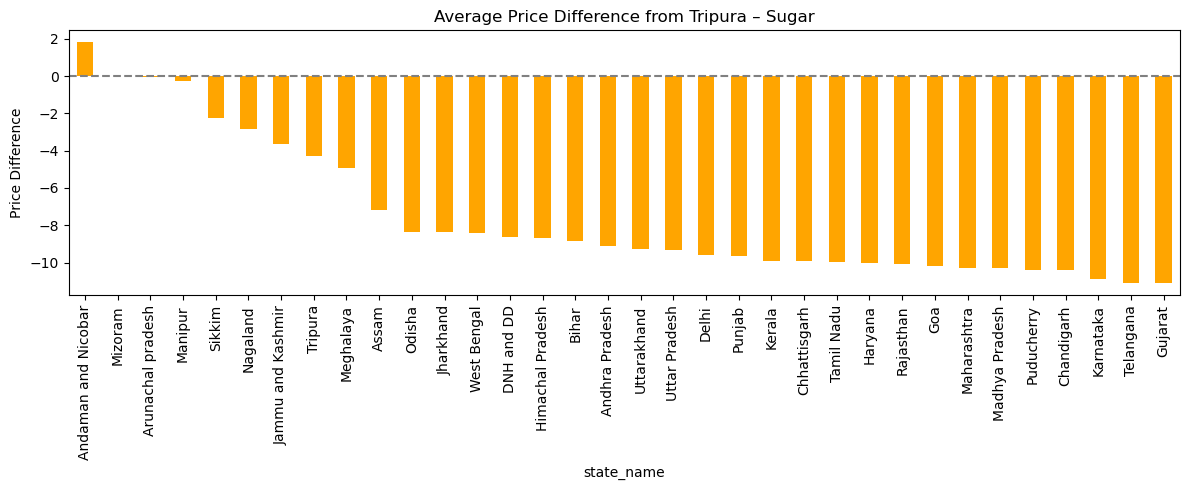

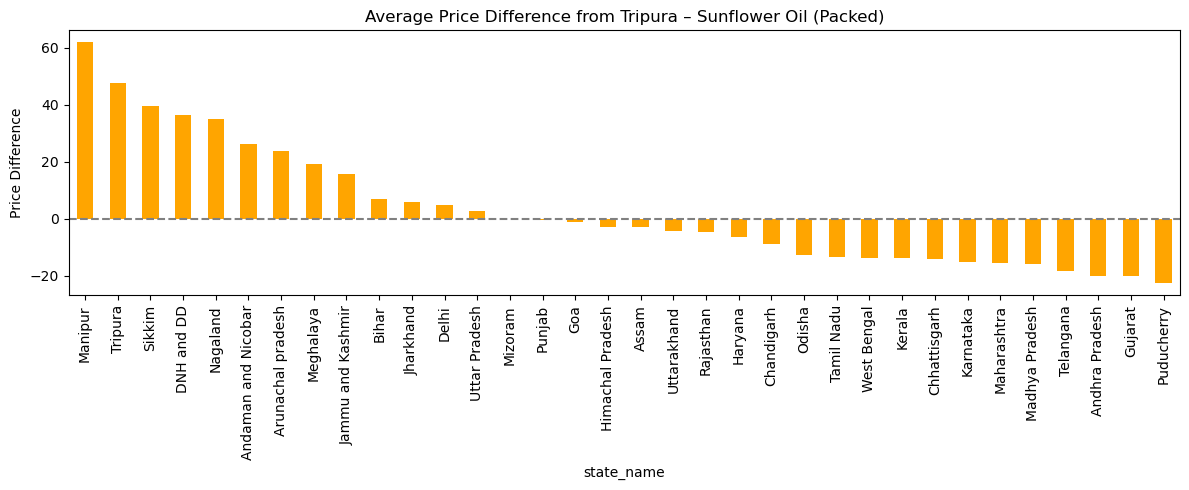

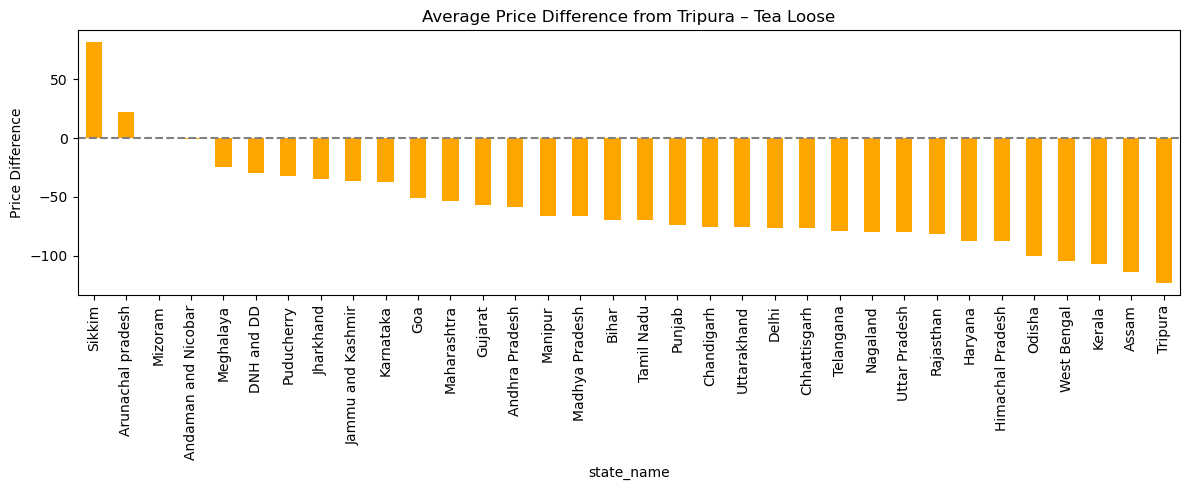

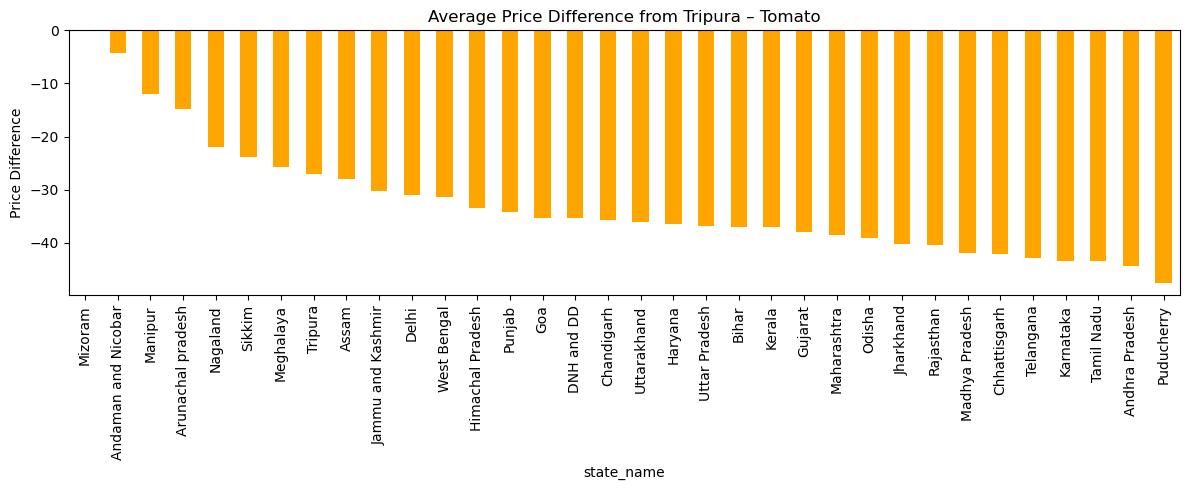

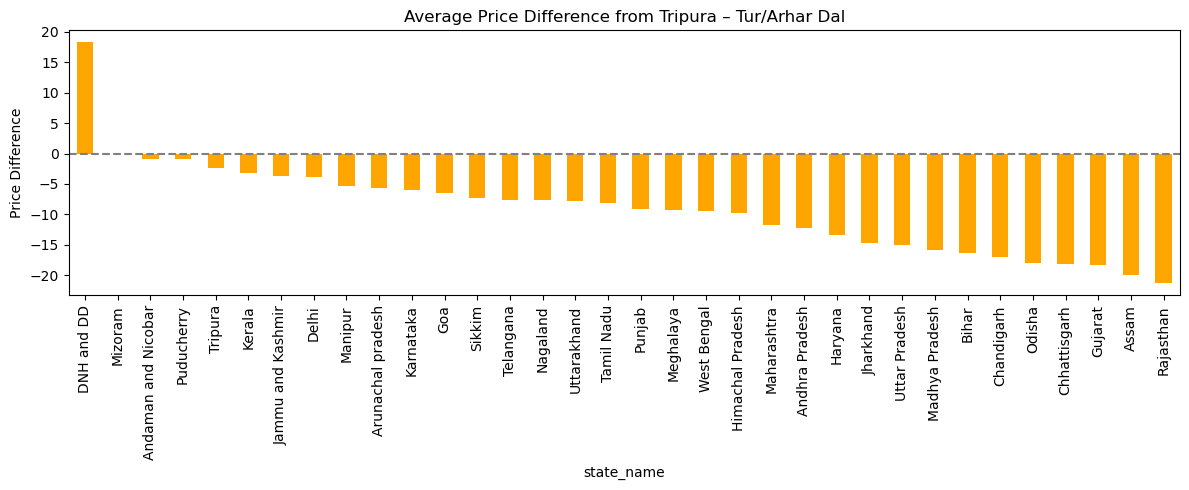

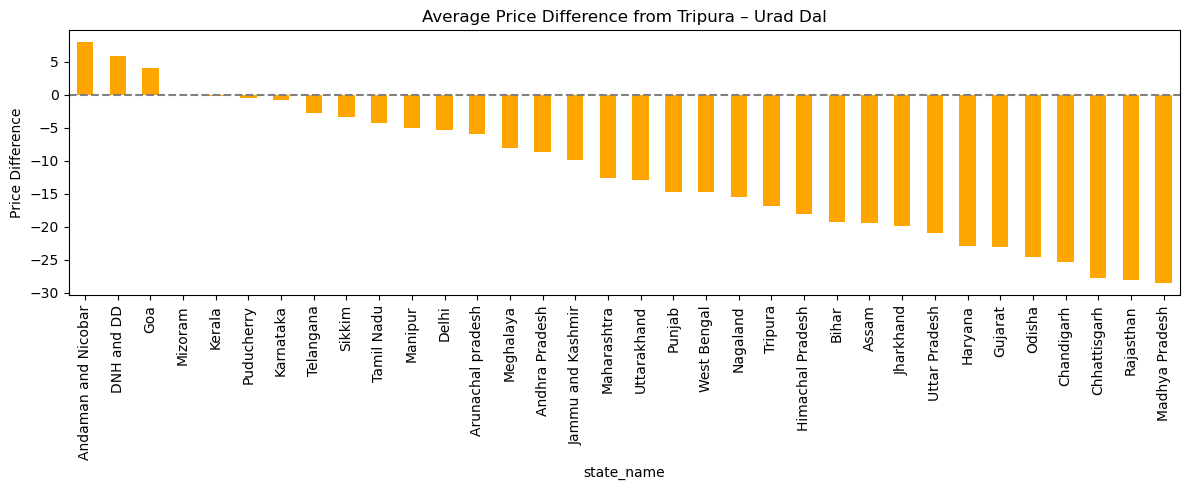

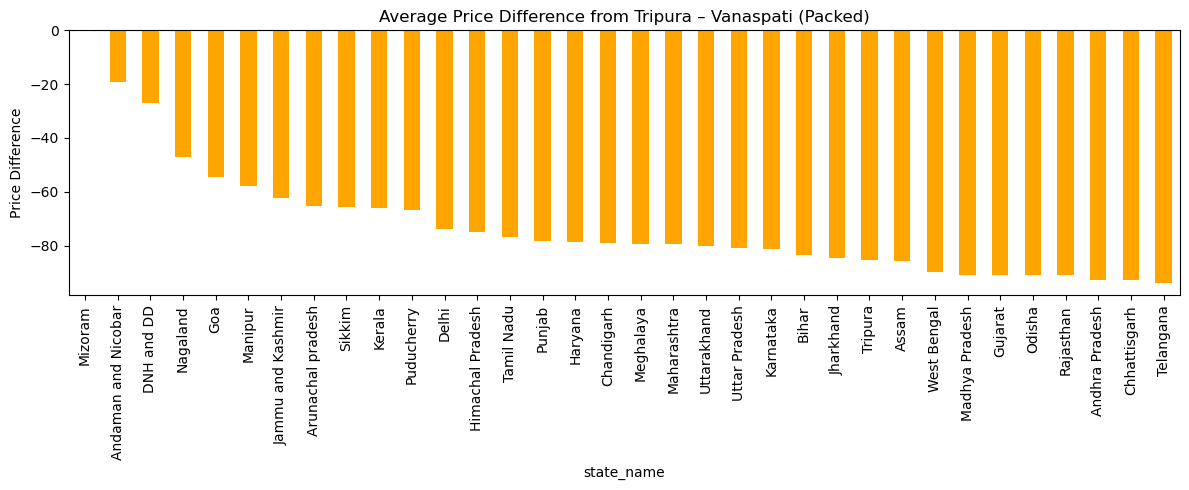

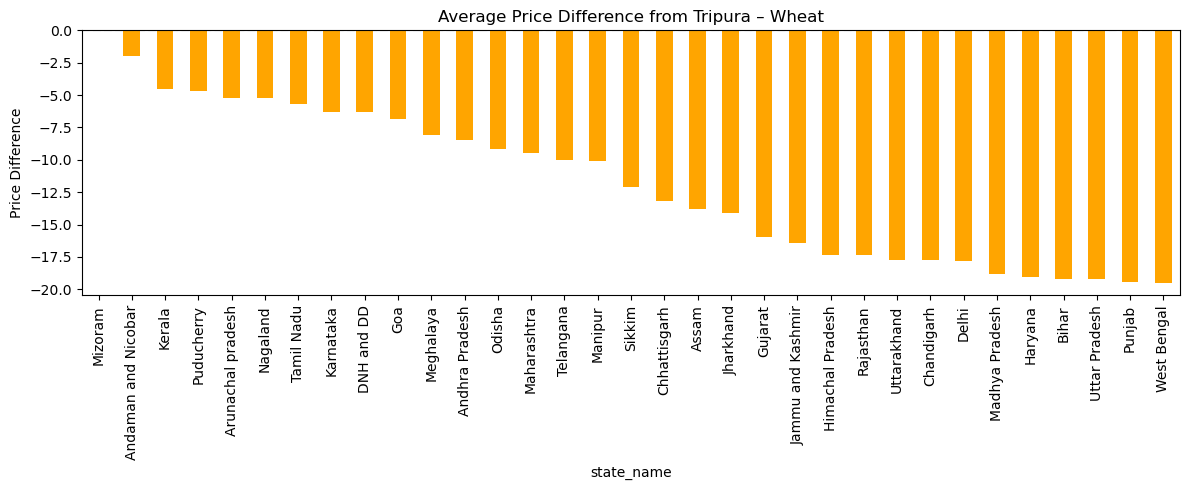

In [658]:
import matplotlib.pyplot as plt

for commodity in price_diff.columns:
    plt.figure(figsize=(12, 5))
    price_diff_sorted = price_diff[commodity].dropna().sort_values(ascending=False)
    price_diff_sorted.plot(kind='bar', color='orange')
    plt.title(f'Average Price Difference from Tripura – {commodity}')
    plt.ylabel('Price Difference')
    plt.xlabel('state_name')
    plt.axhline(0, color='gray', linestyle='--')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [660]:
df['commodity'].value_counts()

commodity
Rice                      86428
Wheat                     86428
Onion                     86428
Potato                    86428
Salt Pack (Iodised)       86428
Tea Loose                 86428
Gur                       86428
Palm Oil (Packed)         86428
Sunflower Oil (Packed)    86428
Soya Oil (Packed)         86428
Vanaspati (Packed)        86428
Mustard Oil (Packed)      86428
Groundnut Oil (Packed)    86428
Milk @                    86428
Sugar                     86428
Masoor Dal                86428
Moong Dal                 86428
Urad Dal                  86428
Tur/Arhar Dal             86428
Gram Dal                  86428
Atta (Wheat)              86428
Tomato                    86428
Name: count, dtype: int64

In [661]:
# Calculate standard deviation of prices across states for each commodity and date
price_variation = df.groupby(['commodity', 'date'])['price'].std().reset_index()
price_variation.rename(columns={'price': 'std_dev'}, inplace=True)

# View variation over time for a commodity
price_variation[price_variation['commodity'] == 'Wheat'].head()


,commodity,date,std_dev
65835,Wheat,2015-01-01,4.246361
65836,Wheat,2015-01-02,4.902942
65837,Wheat,2015-01-03,4.902942
65838,Wheat,2015-01-04,4.902942
65839,Wheat,2015-01-05,4.902942


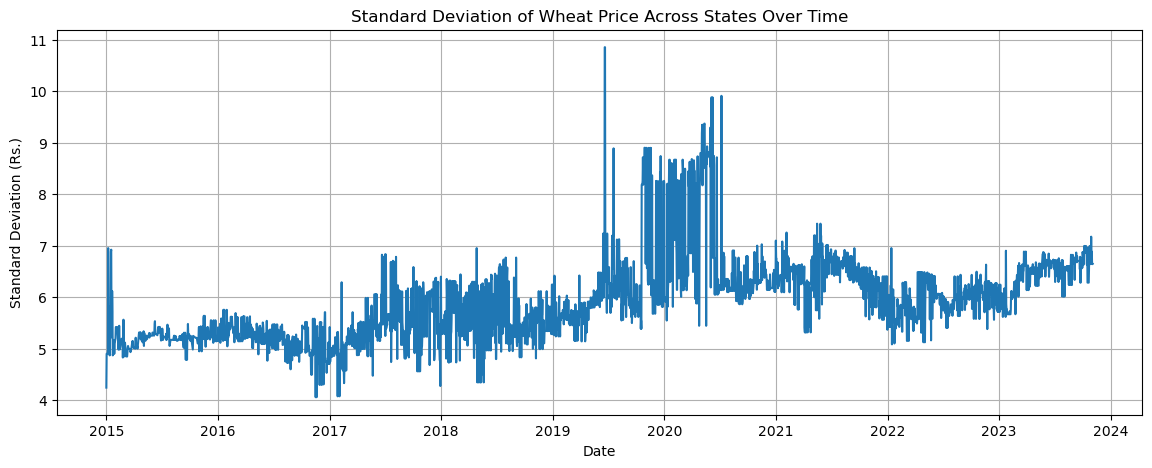

In [662]:
wheat_var = price_variation[price_variation['commodity'] == 'Wheat']
plt.figure(figsize=(14, 5))
plt.plot(wheat_var['date'], wheat_var['std_dev'])
plt.title("Standard Deviation of Wheat Price Across States Over Time")
plt.ylabel("Standard Deviation (Rs.)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [663]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Filter for 'Rice' in 'Maharashtra'
state = 'Madhya Pradesh'
commodity = 'Rice'

df_filtered = df[(df['state_name'] == state) & (df['commodity'] == commodity)].copy()


df_filtered.sort_values('date', inplace=True)


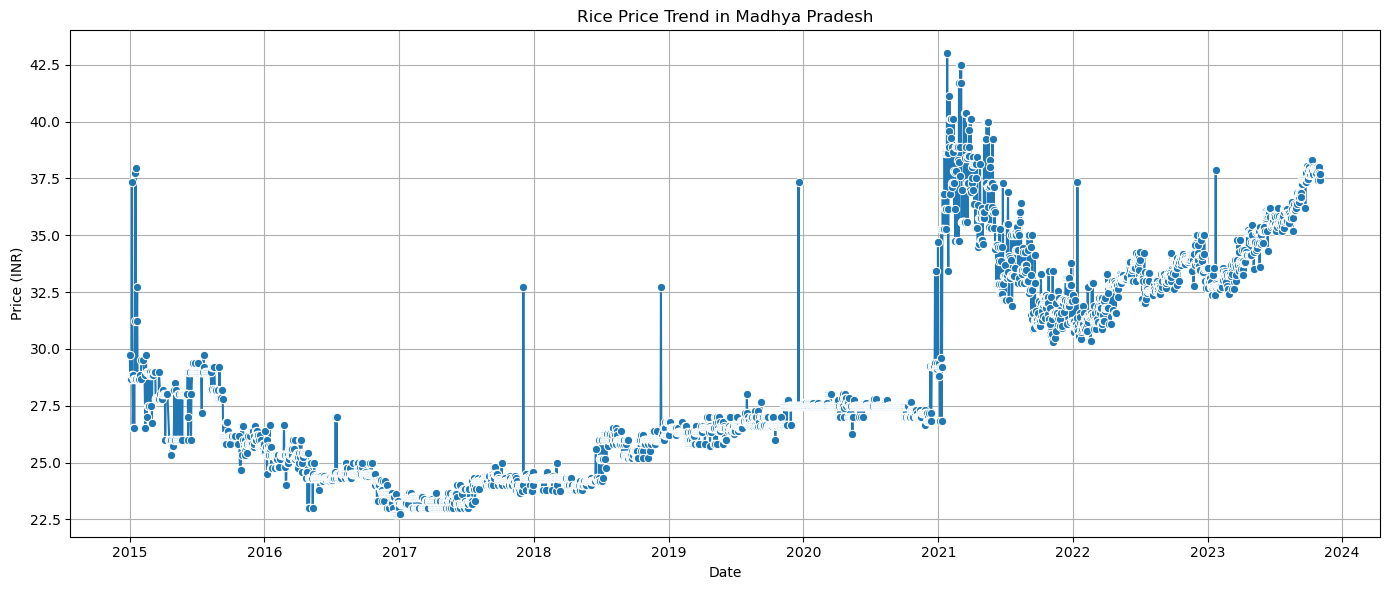

In [664]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='date', y='price', marker='o')
plt.title(f'{commodity} Price Trend in {state}')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [665]:
df.columns
df.head()

,date,state_name,commodity,price,Year,Month,Day,WeekOfYear
0,2015-01-01,Andhra Pradesh,Rice,26.0,2015,1,1,1
1,2015-01-01,Assam,Rice,24.0,2015,1,1,1
2,2015-01-01,Bihar,Rice,NaN,2015,1,1,1
3,2015-01-01,Chandigarh,Rice,29.0,2015,1,1,1
4,2015-01-01,Chhattisgarh,Rice,26.0,2015,1,1,1


In [666]:
# Fill missing prices with the mean across states on the same date for that commodity
#df['price'] = df.groupby(['commodity', 'date'])['price'].transform(lambda x: x.fillna(x.mean()))


In [667]:
df['price'].isnull().sum()

75288

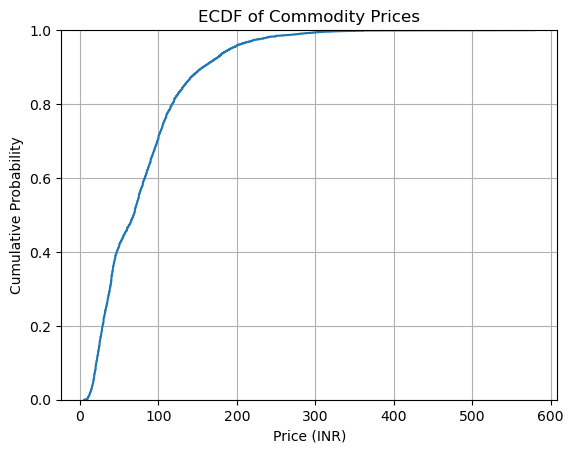

In [668]:

# Assume df is your DataFrame and 'price' is the column
sns.ecdfplot(data=df, x='price')
plt.title('ECDF of Commodity Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()



In [669]:
df.head(20)

,date,state_name,commodity,price,Year,Month,Day,WeekOfYear
0,2015-01-01,Andhra Pradesh,Rice,26.00,2015,1,1,1
1,2015-01-01,Assam,Rice,24.00,2015,1,1,1
2,2015-01-01,Bihar,Rice,NaN,2015,1,1,1
3,2015-01-01,Chandigarh,Rice,29.00,2015,1,1,1
4,2015-01-01,Chhattisgarh,Rice,26.00,2015,1,1,1
5,2015-01-01,Delhi,Rice,30.00,2015,1,1,1
6,2015-01-01,Goa,Rice,35.00,2015,1,1,1
7,2015-01-01,Gujarat,Rice,22.00,2015,1,1,1
8,2015-01-01,Haryana,Rice,25.50,2015,1,1,1
9,2015-01-01,Himachal Pradesh,Rice,31.00,2015,1,1,1


In [670]:
rice_data = df[df['commodity'] == 'Rice']


In [671]:
north_states = ['Punjab', 'Haryana', 'Delhi', 'Uttar Pradesh']
south_states = ['Karnataka', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh']
east_states = ['West Bengal', 'Odisha', 'Bihar', 'Jharkhand']
west_states = ['Rajasthan', 'Gujarat', 'Maharashtra', 'Goa']
northeast_states = ['Assam', 'Manipur', 'Tripura', 'Meghalaya']

def get_region(state):
    if state in north_states:
        return 'North'
    elif state in south_states:
        return 'South'
    elif state in east_states:
        return 'East'
    elif state in west_states:
        return 'West'
    elif state in northeast_states:
        return 'Northeast'
    else:
        return 'Other'

rice_data['Region'] = rice_data['state_name'].apply(get_region)



In [672]:
rice_data['Region'].unique()
df['Region']=df['state_name'].apply(get_region)

In [673]:
region_variability = (
    df.groupby(['Region', 'date', 'commodity'])['price']
    .std()
    .reset_index()
    .rename(columns={'price': 'RegionPriceStd'})
)

# Optional: View average std per region to get a sense of spread
region_std_summary = region_variability.groupby('Region')['RegionPriceStd'].mean().sort_values()
print(region_std_summary)


Region
North         6.124409
East          6.847836
South         6.973159
West          9.217085
Northeast    10.241864
Other        12.606125
Name: RegionPriceStd, dtype: float64


In [674]:
missing = df['price'].isna().sum()
print(f"Missing prices: {missing} out of {len(df)} ({(missing/len(df))*100:.2f}%)")


Missing prices: 75288 out of 1901416 (3.96%)


In [675]:
df.columns


Index(['date', 'state_name', 'commodity', 'price', 'Year', 'Month', 'Day',
       'WeekOfYear', 'Region'],
      dtype='object')

In [676]:
import pandas as pd
import numpy as np



# Create shifted versions for previous and next price
df['prev_price'] = df.groupby(['state_name', 'commodity'])['price'].shift(1)
df['next_price'] = df.groupby(['state_name', 'commodity'])['price'].shift(-1)

# Only fill where price is NaN and both neighbors exist
mask = df['price'].isna() & df['prev_price'].notna() & df['next_price'].notna()
df.loc[mask, 'price'] = (df.loc[mask, 'prev_price'] + df.loc[mask, 'next_price']) / 2

# Drop temporary columns
df.drop(columns=['prev_price', 'next_price'], inplace=True)



In [677]:
df['price'].isnull().sum()


56363

In [678]:
missing_by_state = df[df['price'].isnull()].groupby('state_name').size().sort_values(ascending=False)
print(missing_by_state)

state_name
Tripura                9158
Mizoram                5686
Assam                  3968
Arunachal pradesh      3522
Andaman and Nicobar    3516
Odisha                 3421
Sikkim                 3246
Puducherry             2892
Himachal Pradesh       2442
Manipur                2252
Uttarakhand            2043
Bihar                  1904
Tamil Nadu             1758
Jammu and Kashmir      1751
Chandigarh             1737
Kerala                 1562
Nagaland               1477
Rajasthan               982
Punjab                  819
Meghalaya               764
Goa                     564
Delhi                   546
Andhra Pradesh          244
Uttar Pradesh            75
West Bengal              18
DNH and DD               12
Karnataka                 2
Telangana                 2
dtype: int64


In [699]:
# Filter rows with missing values
missing_data = df[df.isnull().any(axis=1)]

# Group by both state and commodity, then count missing rows
grouped_missing = missing_data.groupby(['state_name', 'commodity']).size().reset_index(name='missing_count')

# Print in the desired format
for _, row in grouped_missing.iterrows():
    print(f"{row['state_name']} : {row['commodity']} - {row['missing_count']}")


Andaman and Nicobar : Groundnut Oil (Packed) - 1438
Andaman and Nicobar : Gur - 2
Andaman and Nicobar : Masoor Dal - 2
Andaman and Nicobar : Milk @ - 4
Andaman and Nicobar : Moong Dal - 4
Andaman and Nicobar : Mustard Oil (Packed) - 10
Andaman and Nicobar : Onion - 4
Andaman and Nicobar : Palm Oil (Packed) - 14
Andaman and Nicobar : Potato - 4
Andaman and Nicobar : Salt Pack (Iodised) - 4
Andaman and Nicobar : Soya Oil (Packed) - 1930
Andaman and Nicobar : Sugar - 2
Andaman and Nicobar : Sunflower Oil (Packed) - 8
Andaman and Nicobar : Tea Loose - 16
Andaman and Nicobar : Tomato - 12
Andaman and Nicobar : Tur/Arhar Dal - 2
Andaman and Nicobar : Urad Dal - 4
Andaman and Nicobar : Vanaspati (Packed) - 24
Andaman and Nicobar : Wheat - 32
Andhra Pradesh : Soya Oil (Packed) - 244
Arunachal pradesh : Groundnut Oil (Packed) - 1392
Arunachal pradesh : Gur - 111
Arunachal pradesh : Milk @ - 32
Arunachal pradesh : Mustard Oil (Packed) - 89
Arunachal pradesh : Onion - 20
Arunachal pradesh : Palm 

In [701]:
# Group the full DataFrame by state_name and commodity, then count total rows
total_counts = df.groupby(['state_name', 'commodity']).size().reset_index(name='total_count')

# Print in desired format
for _, row in total_counts.iterrows():
    print(f"{row['state_name']} : {row['commodity']} - {row['total_count']}")


Andaman and Nicobar : Atta (Wheat) - 1930
Andaman and Nicobar : Gram Dal - 1930
Andaman and Nicobar : Groundnut Oil (Packed) - 1930
Andaman and Nicobar : Gur - 1930
Andaman and Nicobar : Masoor Dal - 1930
Andaman and Nicobar : Milk @ - 1930
Andaman and Nicobar : Moong Dal - 1930
Andaman and Nicobar : Mustard Oil (Packed) - 1930
Andaman and Nicobar : Onion - 1930
Andaman and Nicobar : Palm Oil (Packed) - 1930
Andaman and Nicobar : Potato - 1930
Andaman and Nicobar : Rice - 1930
Andaman and Nicobar : Salt Pack (Iodised) - 1930
Andaman and Nicobar : Soya Oil (Packed) - 1930
Andaman and Nicobar : Sugar - 1930
Andaman and Nicobar : Sunflower Oil (Packed) - 1930
Andaman and Nicobar : Tea Loose - 1930
Andaman and Nicobar : Tomato - 1930
Andaman and Nicobar : Tur/Arhar Dal - 1930
Andaman and Nicobar : Urad Dal - 1930
Andaman and Nicobar : Vanaspati (Packed) - 1930
Andaman and Nicobar : Wheat - 1930
Andhra Pradesh : Atta (Wheat) - 3118
Andhra Pradesh : Gram Dal - 3118
Andhra Pradesh : Groundnut

In [702]:
# Step 1: Count total and missing per group
total_counts = df.groupby(['state_name', 'commodity']).size().reset_index(name='total_count')
missing_counts = df[df.isnull().any(axis=1)].groupby(['state_name', 'commodity']).size().reset_index(name='missing_count')

# Step 2: Merge and compute missing %
combined = pd.merge(total_counts, missing_counts, on=['state_name', 'commodity'], how='left')
combined['missing_count'] = combined['missing_count'].fillna(0)
combined['missing_pct'] = (combined['missing_count'] / combined['total_count']) * 100

# Step 3: Filter combinations with ≥ 20% missing
to_drop = combined[combined['missing_pct'] >= 20][['state_name', 'commodity']]

# Step 4: Remove rows from df matching those combinations
df = df.merge(to_drop, on=['state_name', 'commodity'], how='left', indicator=True)
df = df[df['_merge'] == 'left_only'].drop(columns=['_merge']).reset_index(drop=True)


In [704]:
df.shape

(1822807, 9)

In [705]:
df['date'].value_counts()

date
2023-01-27    711
2022-11-06    711
2022-09-17    711
2023-02-07    711
2023-02-21    711
             ... 
2016-02-14    236
2016-02-16    236
2016-02-13    236
2016-02-12    236
2015-02-26    207
Name: count, Length: 3135, dtype: int64

In [713]:
import pandas as pd

# count total and missing rows per state-commodity group
total_counts = df.groupby(['state_name', 'commodity']).size().reset_index(name='total_count')
missing_counts = df[df.isnull().any(axis=1)].groupby(['state_name', 'commodity']).size().reset_index(name='missing_count')

# Merge and calculate missing %
combined = pd.merge(total_counts, missing_counts, on=['state_name', 'commodity'], how='left')
combined['missing_count'] = combined['missing_count'].fillna(0)
combined['missing_pct'] = (combined['missing_count'] / combined['total_count']) * 100

#Filter groups with ≥ 20% missing
to_drop = combined[combined['missing_pct'] >= 20][['state_name', 'commodity']]

#Find missing columns per group
missing_cols = []
for _, row in to_drop.iterrows():
    subset = df[(df['state_name'] == row['state_name']) & (df['commodity'] == row['commodity'])]
    missing = subset.columns[subset.isnull().any()].tolist()
    missing_cols.append({
        'state_name': row['state_name'],
        'commodity': row['commodity'],
        'missing_columns': missing
    })

# Display missing columns
missing_info = pd.DataFrame(missing_cols)
print("Groups with ≥ 20% missing and their missing columns:")
print(missing_info)

#Drop rows from df that match these groups
df = df.merge(to_drop, on=['state_name', 'commodity'], how='left', indicator=True)
df = df[df['_merge'] == 'left_only'].drop(columns=['_merge']).reset_index(drop=True)


Groups with ≥ 20% missing and their missing columns:
Empty DataFrame
Columns: []
Index: []


In [715]:
df.shape

(1822807, 9)

In [717]:
df['date'].value_counts()

date
2023-01-27    711
2022-11-06    711
2022-09-17    711
2023-02-07    711
2023-02-21    711
             ... 
2016-02-14    236
2016-02-16    236
2016-02-13    236
2016-02-12    236
2015-02-26    207
Name: count, Length: 3135, dtype: int64

In [719]:
df['price'].isnull().sum()

5679

In [721]:
missing_by_state = df[df['price'].isnull()].groupby('state_name').size().sort_values(ascending=False)
print(missing_by_state)

state_name
Nagaland               1087
Meghalaya               764
Arunachal pradesh       593
Goa                     564
Delhi                   546
Manipur                 441
Mizoram                 430
Himachal Pradesh        362
Andhra Pradesh          244
Assam                   181
Odisha                  154
Andaman and Nicobar     148
Uttar Pradesh            75
Sikkim                   27
West Bengal              18
Jammu and Kashmir        14
DNH and DD               12
Puducherry                8
Bihar                     5
Karnataka                 2
Rajasthan                 2
Telangana                 2
dtype: int64


In [723]:
# Make sure date is datetime and sorted
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['state_name', 'commodity', 'date'])

# Interpolate 'price' using transform to preserve index alignment
df['price'] = (
    df.groupby(['state_name', 'commodity'])['price']
      .transform(lambda group: group.interpolate(method='linear', limit=4, limit_direction='both'))
)


In [724]:
print("Remaining missing values in 'price':", df['price'].isnull().sum())


Remaining missing values in 'price': 438


In [727]:
df['price'] = (
    df.groupby(['state_name', 'commodity'])['price']
      .transform(lambda group: group.fillna(method='ffill').fillna(method='bfill'))
)


In [729]:
missing_by_state = df[df['price'].isnull()].groupby('state_name').size().sort_values(ascending=False)
print(missing_by_state)

Series([], dtype: int64)


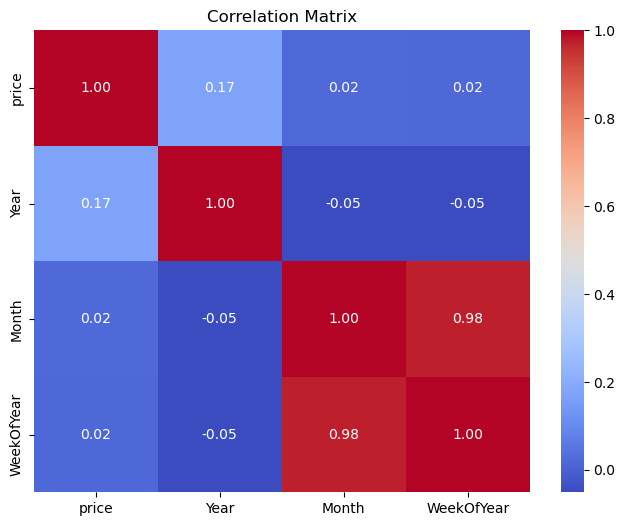

In [731]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns or the ones you're interested in
features = ['price', 'Year', 'Month', 'WeekOfYear']  # add more if relevant
corr_matrix = df[features].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


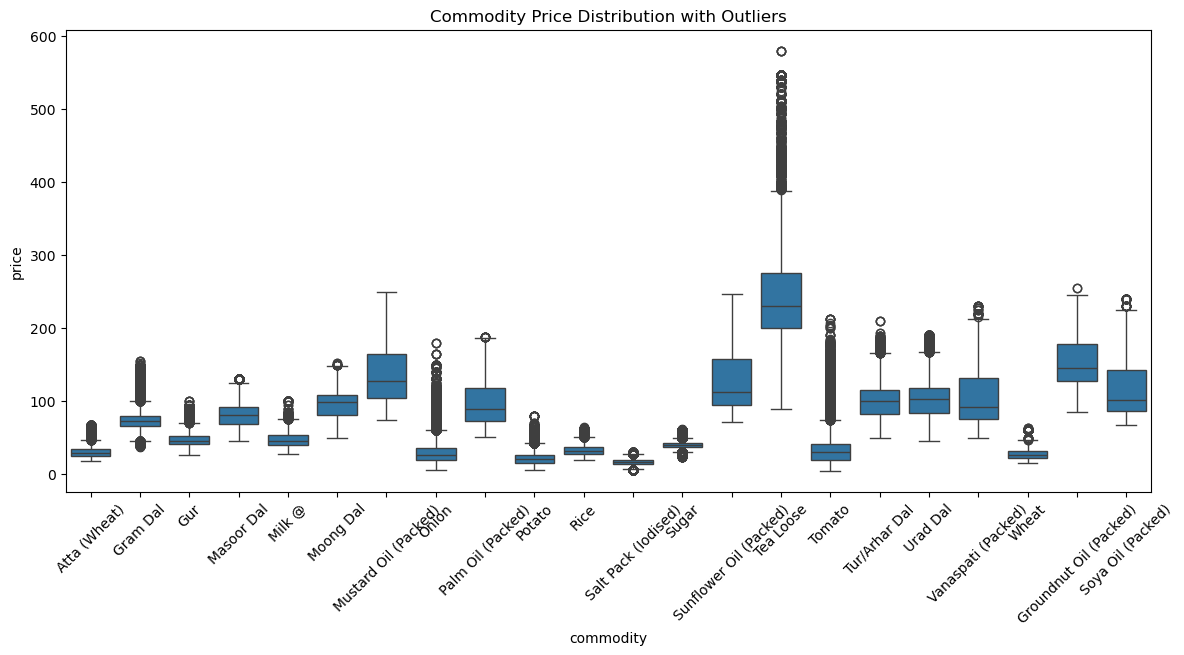

In [733]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot by commodity
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='commodity', y='price')
plt.xticks(rotation=45)
plt.title('Commodity Price Distribution with Outliers')
plt.show()

# IQR filtering
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]


In [734]:
#Commodities like Onion, Tomato, Tea Loose, and Sunflower Oil (Packed) have a high number of outliers
#Wheat, Salt Pack (Iodised), and Potato have very narrow price ranges, meaning they're quite stable.


ADF Statistic: 0.15840942447269532
p-value: 0.9698300250999459


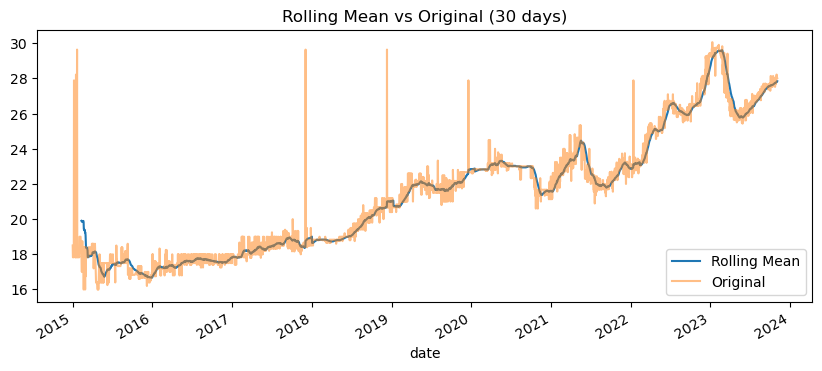

In [737]:
from statsmodels.tsa.stattools import adfuller

# Choose one state and commodity for analysis
sample = df[(df['state_name'] == 'Madhya Pradesh') & (df['commodity'] == 'Wheat')]
sample = sample.sort_values('date')

# ADF Test
result = adfuller(sample['price'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # p < 0.05 indicates stationarity

# Rolling mean plot
sample.set_index('date', inplace=True)
sample['price'].rolling(30).mean().plot(label='Rolling Mean', figsize=(10, 4))
sample['price'].plot(label='Original', alpha=0.5)
plt.legend()
plt.title('Rolling Mean vs Original (30 days)')
plt.show()


In [592]:
#The orange line has many sharp spikes and drops → indicates high short-term volatility.
#The rolling mean smooths this out, showing broader trends more clearly.

In [739]:
#Orange line ("Original"): This is your actual raw price data.

#Blue line ("Rolling Mean"): This is the 30-day rolling average, which smooths out short-term fluctuations and highlights long-term trends..

In [741]:
print(df.columns)

Index(['date', 'state_name', 'commodity', 'price', 'Year', 'Month', 'Day',
       'WeekOfYear', 'Region'],
      dtype='object')


In [743]:
df.head()

,date,state_name,commodity,price,Year,Month,Day,WeekOfYear,Region
301642,2015-01-06,Andaman and Nicobar,Atta (Wheat),45.0,2015,1,6,2,Other
358849,2015-01-07,Andaman and Nicobar,Atta (Wheat),68.0,2015,1,7,2,Other
477438,2015-01-09,Andaman and Nicobar,Atta (Wheat),52.0,2015,1,9,2,Other
656024,2015-01-12,Andaman and Nicobar,Atta (Wheat),44.0,2015,1,12,3,Other
717560,2015-01-13,Andaman and Nicobar,Atta (Wheat),52.0,2015,1,13,3,Other


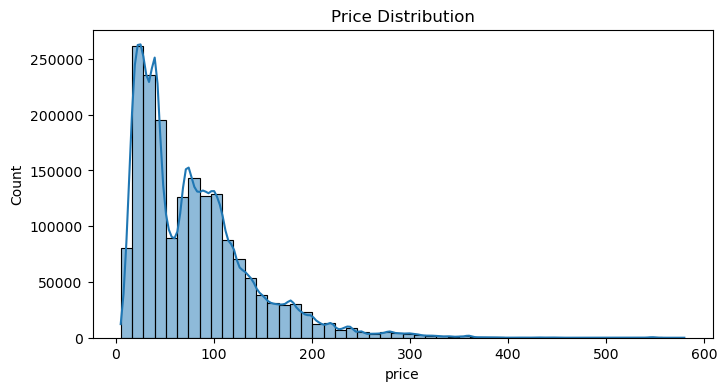

In [745]:

plt.figure(figsize=(8, 4))
sns.histplot(df['price'].dropna(), kde=True, bins=50)
plt.title('Price Distribution')
plt.show()

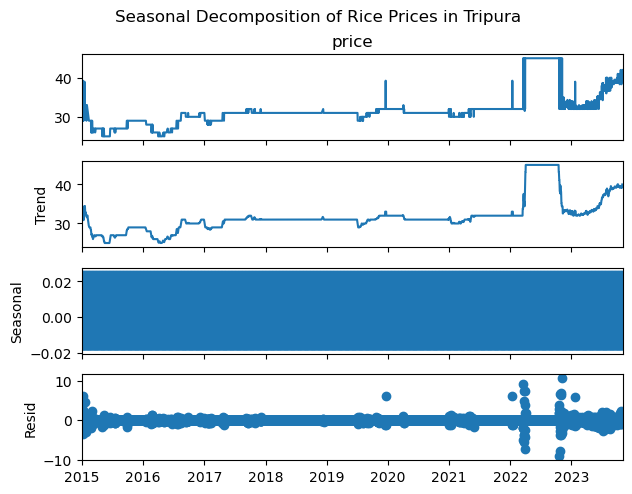

In [602]:
from statsmodels.tsa.seasonal import seasonal_decompose

# For one state/commodity
ts = sample['price'].asfreq('D').interpolate()  # daily freq
result = seasonal_decompose(ts, model='additive')

result.plot()
plt.suptitle("Seasonal Decomposition of Rice Prices in Tripura", y=1.02)
plt.show()

In [746]:
#**Prices rose significantly (possibly inflation, supply issues)**
#No strong or regular seasonal pattern detected  ---Almost flat
#Market may have become more volatile or unpredictable recently   --->>> 	Outliers post-2022

commodity
Tea Loose                 58.163377
Sunflower Oil (Packed)    36.394759
Mustard Oil (Packed)      34.880459
Vanaspati (Packed)        33.732008
Soya Oil (Packed)         31.526968
Groundnut Oil (Packed)    30.444215
Palm Oil (Packed)         27.969185
Urad Dal                  24.003938
Tur/Arhar Dal             23.993175
Tomato                    20.246878
Moong Dal                 16.817733
Masoor Dal                15.662589
Onion                     15.191387
Gram Dal                  14.882604
Gur                        9.779371
Milk @                     9.692702
Potato                     8.797453
Atta (Wheat)               7.486349
Rice                       7.456018
Wheat                      6.786402
Sugar                      4.762245
Salt Pack (Iodised)        4.090573
Name: price, dtype: float64


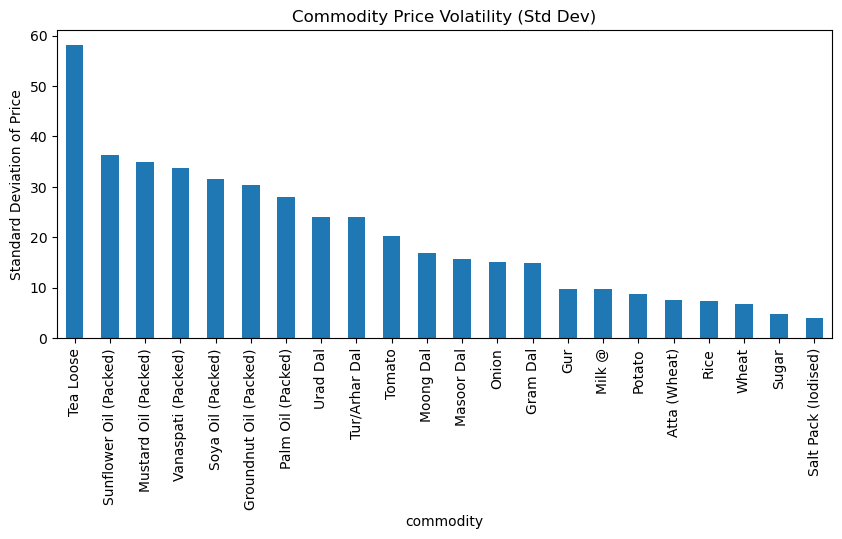

In [747]:
# Standard deviation per commodity
volatility = df.groupby('commodity')['price'].std().sort_values(ascending=False)
print(volatility)

# Plot
volatility.plot(kind='bar', figsize=(10, 4), title='Commodity Price Volatility (Std Dev)')
plt.ylabel('Standard Deviation of Price')
plt.show()


In [751]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Average prices per commodity-state
pivot = df.pivot_table(index='state_name', columns='commodity', values='price', aggfunc='mean').fillna(0)

# Normalize
scaler = StandardScaler()
scaled = scaler.fit_transform(pivot)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pivot['Cluster'] = kmeans.fit_predict(scaled)

# Show cluster assignment
print(pivot['Cluster'].sort_values())


state_name
West Bengal            0
Odisha                 0
Madhya Pradesh         0
Uttarakhand            0
Punjab                 0
Jharkhand              0
Jammu and Kashmir      0
Himachal Pradesh       0
Haryana                0
Gujarat                0
Delhi                  0
Chhattisgarh           0
Chandigarh             0
Bihar                  0
Assam                  0
Tripura                0
Uttar Pradesh          0
Rajasthan              0
Mizoram                1
Nagaland               2
Sikkim                 2
Andaman and Nicobar    2
Manipur                2
Arunachal pradesh      2
Meghalaya              2
Maharashtra            3
Puducherry             3
Karnataka              3
Goa                    3
DNH and DD             3
Tamil Nadu             3
Telangana              3
Andhra Pradesh         3
Kerala                 3
Name: Cluster, dtype: int32


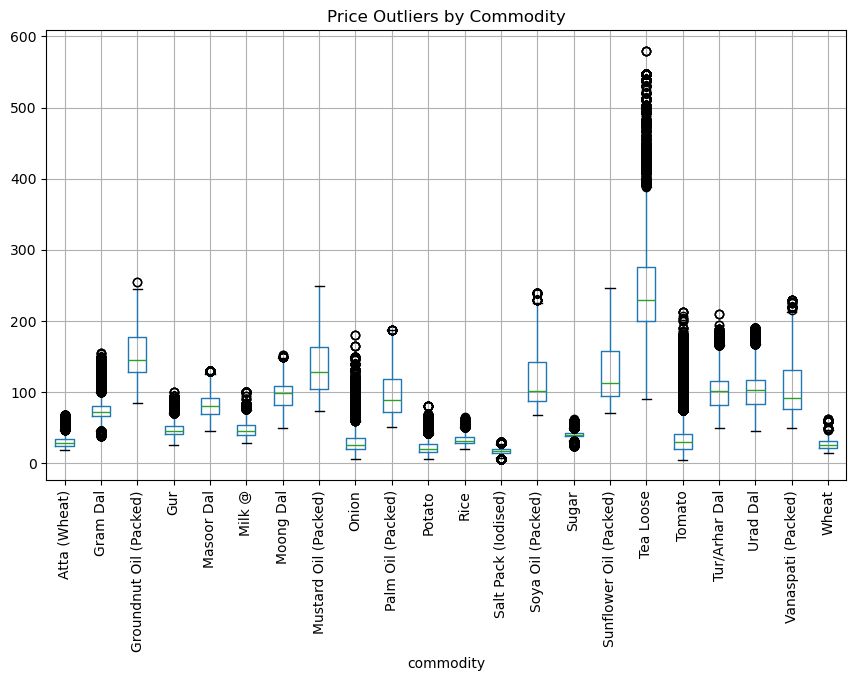

In [753]:
df.boxplot(column='price', by='commodity', figsize=(10,6), rot=90)
plt.title('Price Outliers by Commodity')
plt.suptitle('')
plt.show()


In [755]:
print(df.isnull().sum())


date          0
state_name    0
commodity     0
price         0
Year          0
Month         0
Day           0
WeekOfYear    0
Region        0
dtype: int64


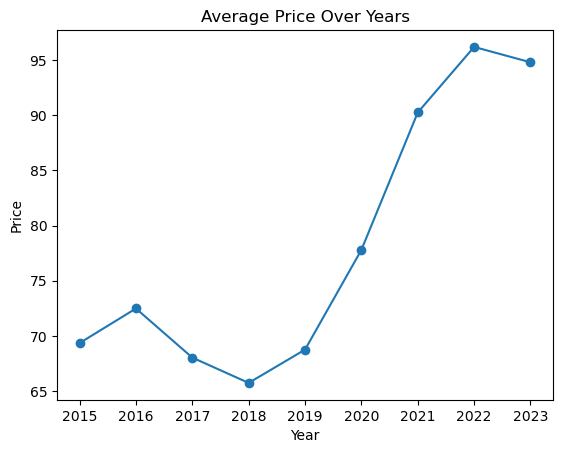

In [757]:
df.groupby('Year')['price'].mean().plot(marker='o')
plt.title('Average Price Over Years')
plt.ylabel('Price')
plt.show()


Text(0.5, 1.0, 'Average Price by Month')

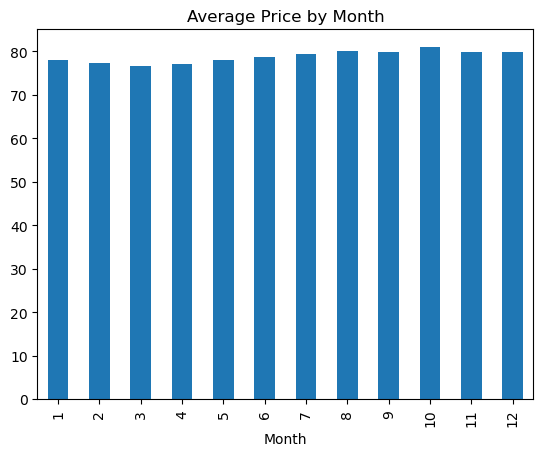

In [759]:
df.groupby('Month')['price'].mean().plot(kind='bar')
plt.title('Average Price by Month')


In [763]:
df['date'] = pd.to_datetime(df['date'])  


In [765]:
df = df.sort_values(by=['state_name', 'commodity', 'date']).reset_index(drop=True)


In [768]:
df.head()

,date,state_name,commodity,price,Year,Month,Day,WeekOfYear,Region
0,2015-01-06,Andaman and Nicobar,Atta (Wheat),45.0,2015,1,6,2,Other
1,2015-01-07,Andaman and Nicobar,Atta (Wheat),68.0,2015,1,7,2,Other
2,2015-01-09,Andaman and Nicobar,Atta (Wheat),52.0,2015,1,9,2,Other
3,2015-01-12,Andaman and Nicobar,Atta (Wheat),44.0,2015,1,12,3,Other
4,2015-01-13,Andaman and Nicobar,Atta (Wheat),52.0,2015,1,13,3,Other


In [767]:
# Save the final DataFrame as a CSV
df.to_csv('final_commodity_prices.csv', index=False)


In [771]:
df['state_name'].value_counts()

state_name
Madhya Pradesh         68860
Maharashtra            68662
West Bengal            68662
Andhra Pradesh         68596
Delhi                  68354
Haryana                67144
Telangana              67144
Gujarat                66374
Chhattisgarh           66220
Tamil Nadu             65058
Punjab                 63903
Himachal Pradesh       63042
Odisha                 61720
Uttar Pradesh          61050
Puducherry             60564
Bihar                  60312
Rajasthan              59661
Uttarakhand            58632
Chandigarh             57603
Assam                  55800
Meghalaya              55528
Jharkhand              55528
Karnataka              54780
Jammu and Kashmir      52899
Goa                    50952
Kerala                 50484
Tripura                41582
Andaman and Nicobar    38600
Nagaland               37443
Sikkim                 32200
Arunachal pradesh      26638
Mizoram                22560
Manipur                17936
DNH and DD              8316
Nam

In [773]:
34*6

204